In [1]:
import os
import cv2
data = []
label = []
for i in os.listdir("archive"):
    if i in ["Normal", "Sick"]: 
        for j in os.listdir(os.path.join("archive", i)):
            if j != ".DS_Store" and os.path.isdir(os.path.join("archive", i, j)): 
                for k in sorted(os.listdir(os.path.join("archive", i, j)))[3:]: 
                    if k != ".DS_Store" and os.path.isdir(os.path.join("archive", i, j, k)):  
                        for l in os.listdir(os.path.join("archive", i, j, k))[:10]:
                            img_path = os.path.join("archive", i, j, k, l)
                            if os.path.isfile(img_path): 
                                img = cv2.imread(img_path) 
                                if img is not None:  
                                    img = cv2.resize(img, (100, 100))
                                    data.append(img)  
                                    if i == "Normal":
                                        label.append(0)  
                                    elif i == "Sick":
                                        label.append(1)


In [2]:
from matplotlib.pyplot import imshow
from numpy import *

In [4]:
len(data)

17920

In [6]:
label.count(0)

10092

In [7]:
label.count(1)

7828

In [8]:
data=array(data)/255
label=array(label)

In [9]:
data.shape

(17920, 100, 100, 3)

In [10]:
label.shape

(17920,)

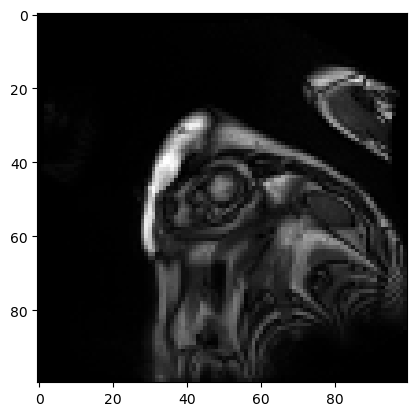

In [11]:
imshow(data[100])

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,label,stratify=label,test_size=0.2)

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 49, 49, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 10, 10, 64)       

In [15]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
448/448 [==============================] - 39s 86ms/step - loss: 0.4894 - accuracy: 0.7441 - val_loss: 0.2997 - val_accuracy: 0.8680
Epoch 2/10
448/448 [==============================] - 40s 90ms/step - loss: 0.2133 - accuracy: 0.9135 - val_loss: 0.2088 - val_accuracy: 0.9219
Epoch 3/10
448/448 [==============================] - 45s 100ms/step - loss: 0.1130 - accuracy: 0.9546 - val_loss: 0.2070 - val_accuracy: 0.9252
Epoch 4/10
448/448 [==============================] - 46s 102ms/step - loss: 0.0692 - accuracy: 0.9736 - val_loss: 0.1907 - val_accuracy: 0.9406
Epoch 5/10
448/448 [==============================] - 46s 103ms/step - loss: 0.0417 - accuracy: 0.9854 - val_loss: 0.1547 - val_accuracy: 0.9526
Epoch 6/10
448/448 [==============================] - 45s 101ms/step - loss: 0.0284 - accuracy: 0.9909 - val_loss: 0.1490 - val_accuracy: 0.9601
Epoch 7/10
448/448 [==============================] - 45s 100ms/step - loss: 0.0315 - accuracy: 0.9904 - val_loss: 0.1722 - val_accu

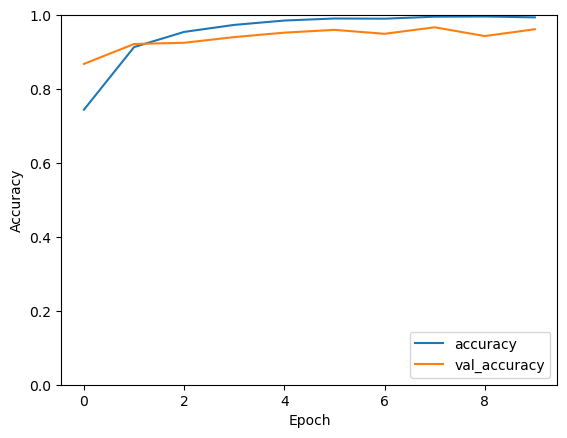

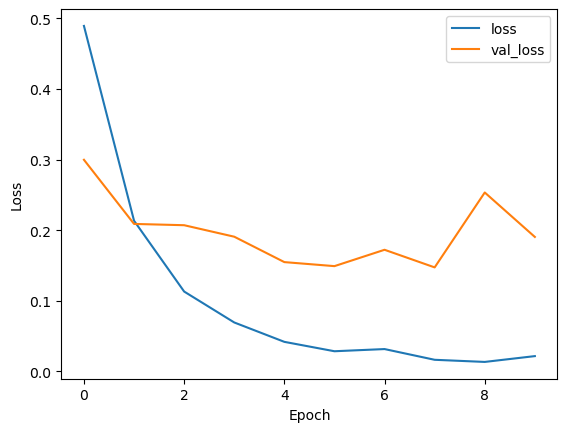

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [17]:
model.save("model.h5")

/Users/abhishek/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
model.save("model.keras")

In [43]:
from sklearn.metrics import *

In [35]:
pred=model.predict(x_test)

112/112 [==============================] - 2s 21ms/step


In [36]:
for i in range(0,len(pred)):
    if pred[i]>=0.5:
        pred[i]=1
    else:
        pred[i]=0

In [42]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97      2041
         1.0       0.95      0.96      0.96      1543

    accuracy                           0.96      3584
   macro avg       0.96      0.96      0.96      3584
weighted avg       0.96      0.96      0.96      3584



In [44]:
confusion_matrix(pred,y_test)

array([[1961,   80],
       [  57, 1486]])